In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
# reading data, printing information about columns 
hour = pd.read_csv("hour.csv")
day = pd.read_csv('day.csv')
hour.info()
day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [3]:
#DATA EXPLORATION

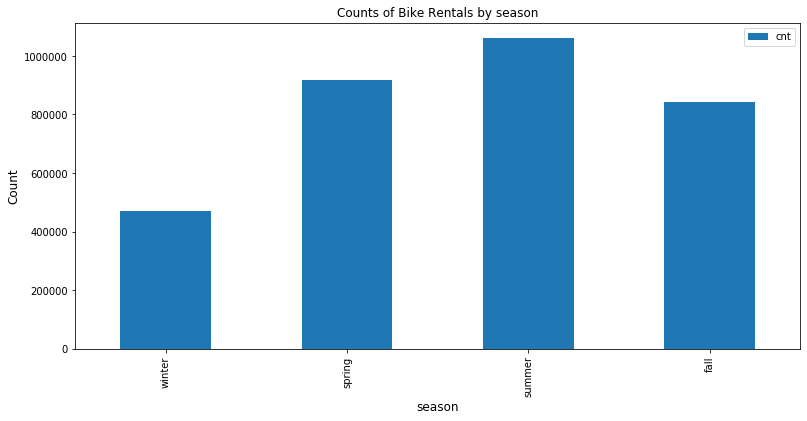

In [4]:
#bike rentals by season
gr = hour[['season','cnt']].groupby(['season']).sum().plot(kind='bar',title ="Counts of Bike Rentals by season",figsize=(13, 6))
gr.set_xlabel("season", fontsize=12)
gr.set_ylabel("Count", fontsize=12)
gr.set_xticklabels(['winter','spring','summer', 'fall'])
plt.show()

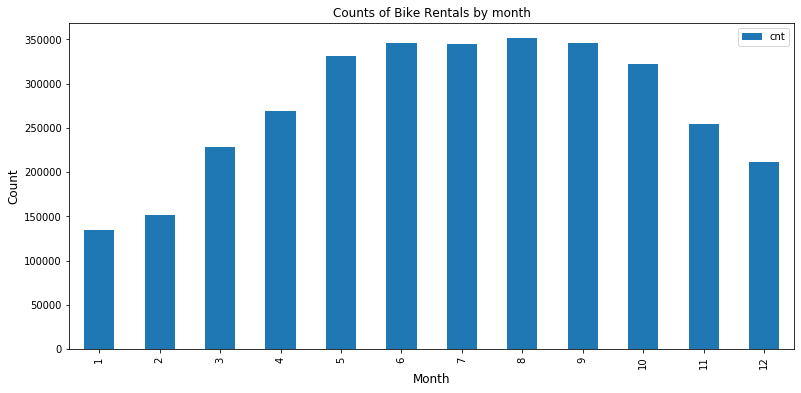

In [5]:
#bike rentals by month
gr = hour[['mnth','cnt']].groupby(['mnth']).sum().plot(kind='bar',title ="Counts of Bike Rentals by month",figsize=(13, 6))
gr.set_xlabel("Month", fontsize=12)
gr.set_ylabel("Count", fontsize=12)

plt.show()

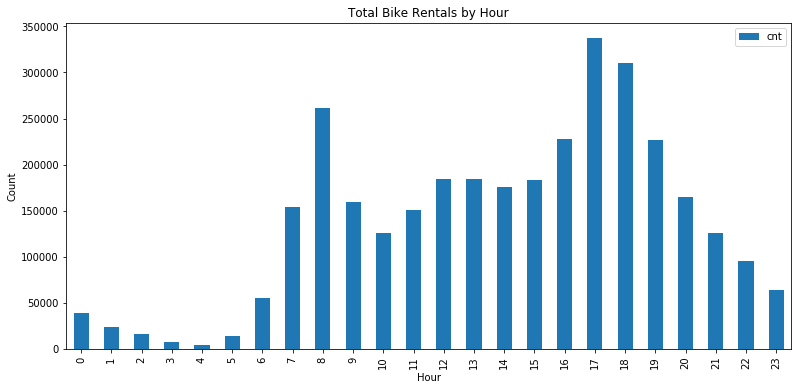

In [6]:
#bike rentals by hours
gr = hour[['hr','cnt']].groupby(['hr']).sum().plot(kind='bar', title ="Total Bike Rentals by Hour",figsize=(13, 6))
gr.set_xlabel("Hour")
gr.set_ylabel("Count")
plt.show()

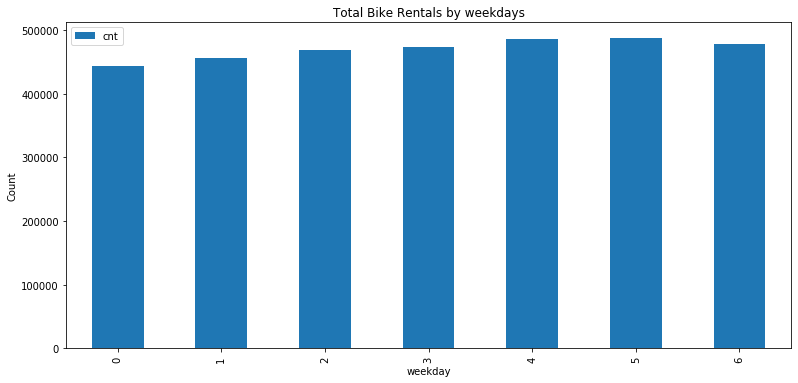

In [7]:
##bike rentals by weekdays
gr = hour[['weekday','cnt']].groupby(['weekday']).sum().plot(kind='bar', title ="Total Bike Rentals by weekdays",figsize=(13, 6))
gr.set_xlabel("weekday")
gr.set_ylabel("Count")
plt.show()

In [8]:
#hourly information about numder of rentals 
hour['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

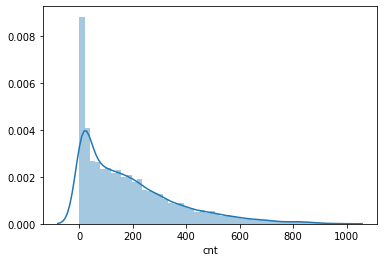

In [9]:
#distribution of rentals per hour
import seaborn as sns
sns.distplot(hour['cnt']);

In [10]:
#Skewness and Kurtosis of hourly rental distribution
print("Skewness: %f" % hour['cnt'].skew())
print("Kurtosis: %f" % hour['cnt'].kurt())


Skewness: 1.277412
Kurtosis: 1.417203


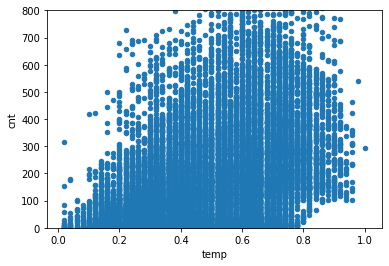

In [11]:
#distribution of rentals by any column. Just put any column name to var
import pandas as pd
var = 'temp'
data = pd.concat([hour['cnt'], hour[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,800));

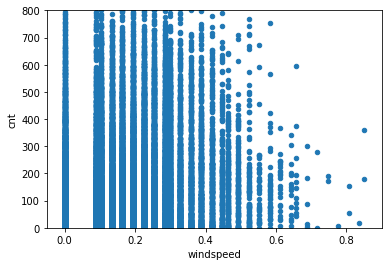

In [12]:
# rentals by wind speed
var = 'windspeed'
data = pd.concat([hour['cnt'], hour[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,800));

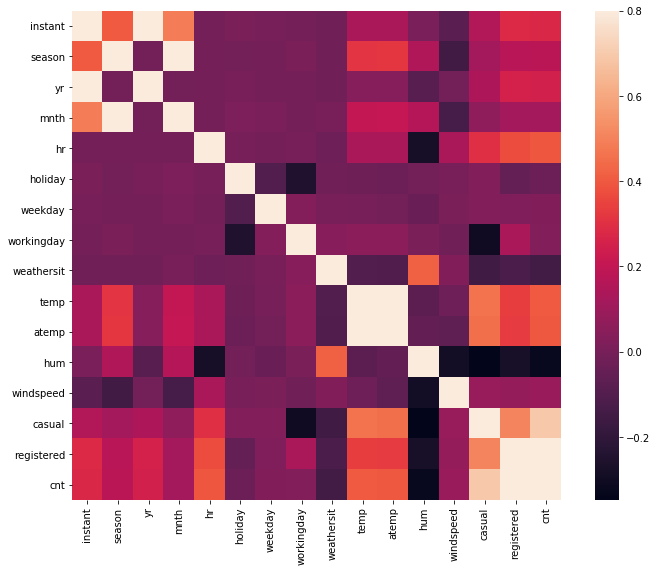

In [13]:
#correlation matrix
corrmat = hour.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [14]:
#missing data
total = hour.isnull().sum().sort_values(ascending=False)
percent = (hour.isnull().sum()/hour.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
cnt,0,0.0
weekday,0,0.0
dteday,0,0.0
season,0,0.0
yr,0,0.0
mnth,0,0.0
hr,0,0.0
holiday,0,0.0
workingday,0,0.0
registered,0,0.0


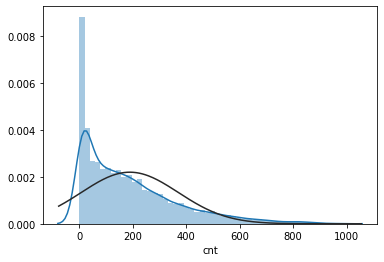

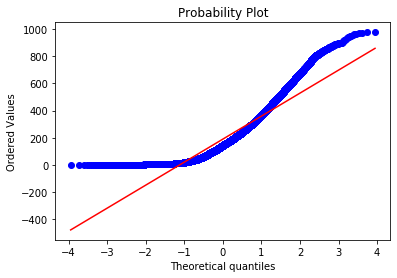

In [15]:
#histogram and normal probability plot
sns.distplot(hour['cnt'], fit=norm);
fig = plt.figure()
res = stats.probplot(hour['cnt'], plot=plt)

In [16]:
#Machine learning

In [17]:
# droping unnesasary data
hour = hour.drop(columns=['dteday','instant','yr','holiday','weekday','weathersit','casual','registered','workingday'])

In [18]:
# Normalizing the data

x=hour.drop(['cnt'],axis=1)
y=hour['cnt']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [19]:
#liner regrestion

linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predicted = linearRegressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
print(df)

mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)

print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

       Actual   Predicted
15978     340  208.899271
11890     256  265.177671
15933     185  239.980029
9835      167  178.112824
11123     463  315.361311
...       ...         ...
5449      106  247.456245
794        72    5.149175
9326      288  191.348475
7034      585  329.401998
16437     228  308.049074

[5214 rows x 2 columns]
Mean Squared Error: 22861.271392355244
R score: 0.32580989234894997
Mean Absolute Error: 111.10314185385607


In [20]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0, n_estimators=300)
rf.fit(x_train,y_train);
y_predicted_r = rf.predict(x_test)

mse = mean_squared_error(y_test, y_predicted_r)
r = r2_score(y_test, y_predicted_r)
mae = mean_absolute_error(y_test,y_predicted_r)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted_r})
print(df)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

       Actual   Predicted
15978     340  298.796667
11890     256  284.400000
15933     185  300.579048
9835      167  200.446667
11123     463  372.000000
...       ...         ...
5449      106  120.557778
794        72   53.680000
9326      288  247.220000
7034      585  739.116667
16437     228  286.760000

[5214 rows x 2 columns]
Mean Squared Error: 10424.200382550785
R score: 0.692585217266694
Mean Absolute Error: 67.53069164900968


In [21]:
#predict my data from file
x_test1 = pd.read_csv("test.csv")
x_test = preprocessing.normalize(x_test1)
y_predicted_r = rf.predict(x_test)
df2=pd.DataFrame(x_test1, columns=['season','mnth','hr','temp','atemp','hum','windspeed'])
df1=pd.DataFrame(y_predicted_r, columns=['cnt'])
df1.to_csv('out.csv', index = False)